In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\User\Desktop\Portfolio Projects\Credit Card Fraud\creditcard.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Check for duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()

# Display the number of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 1081


In [9]:
# Remove duplicates 
df = df.drop_duplicates()
duplicate_rows1 = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows1}")

Number of duplicate rows: 0


In [11]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


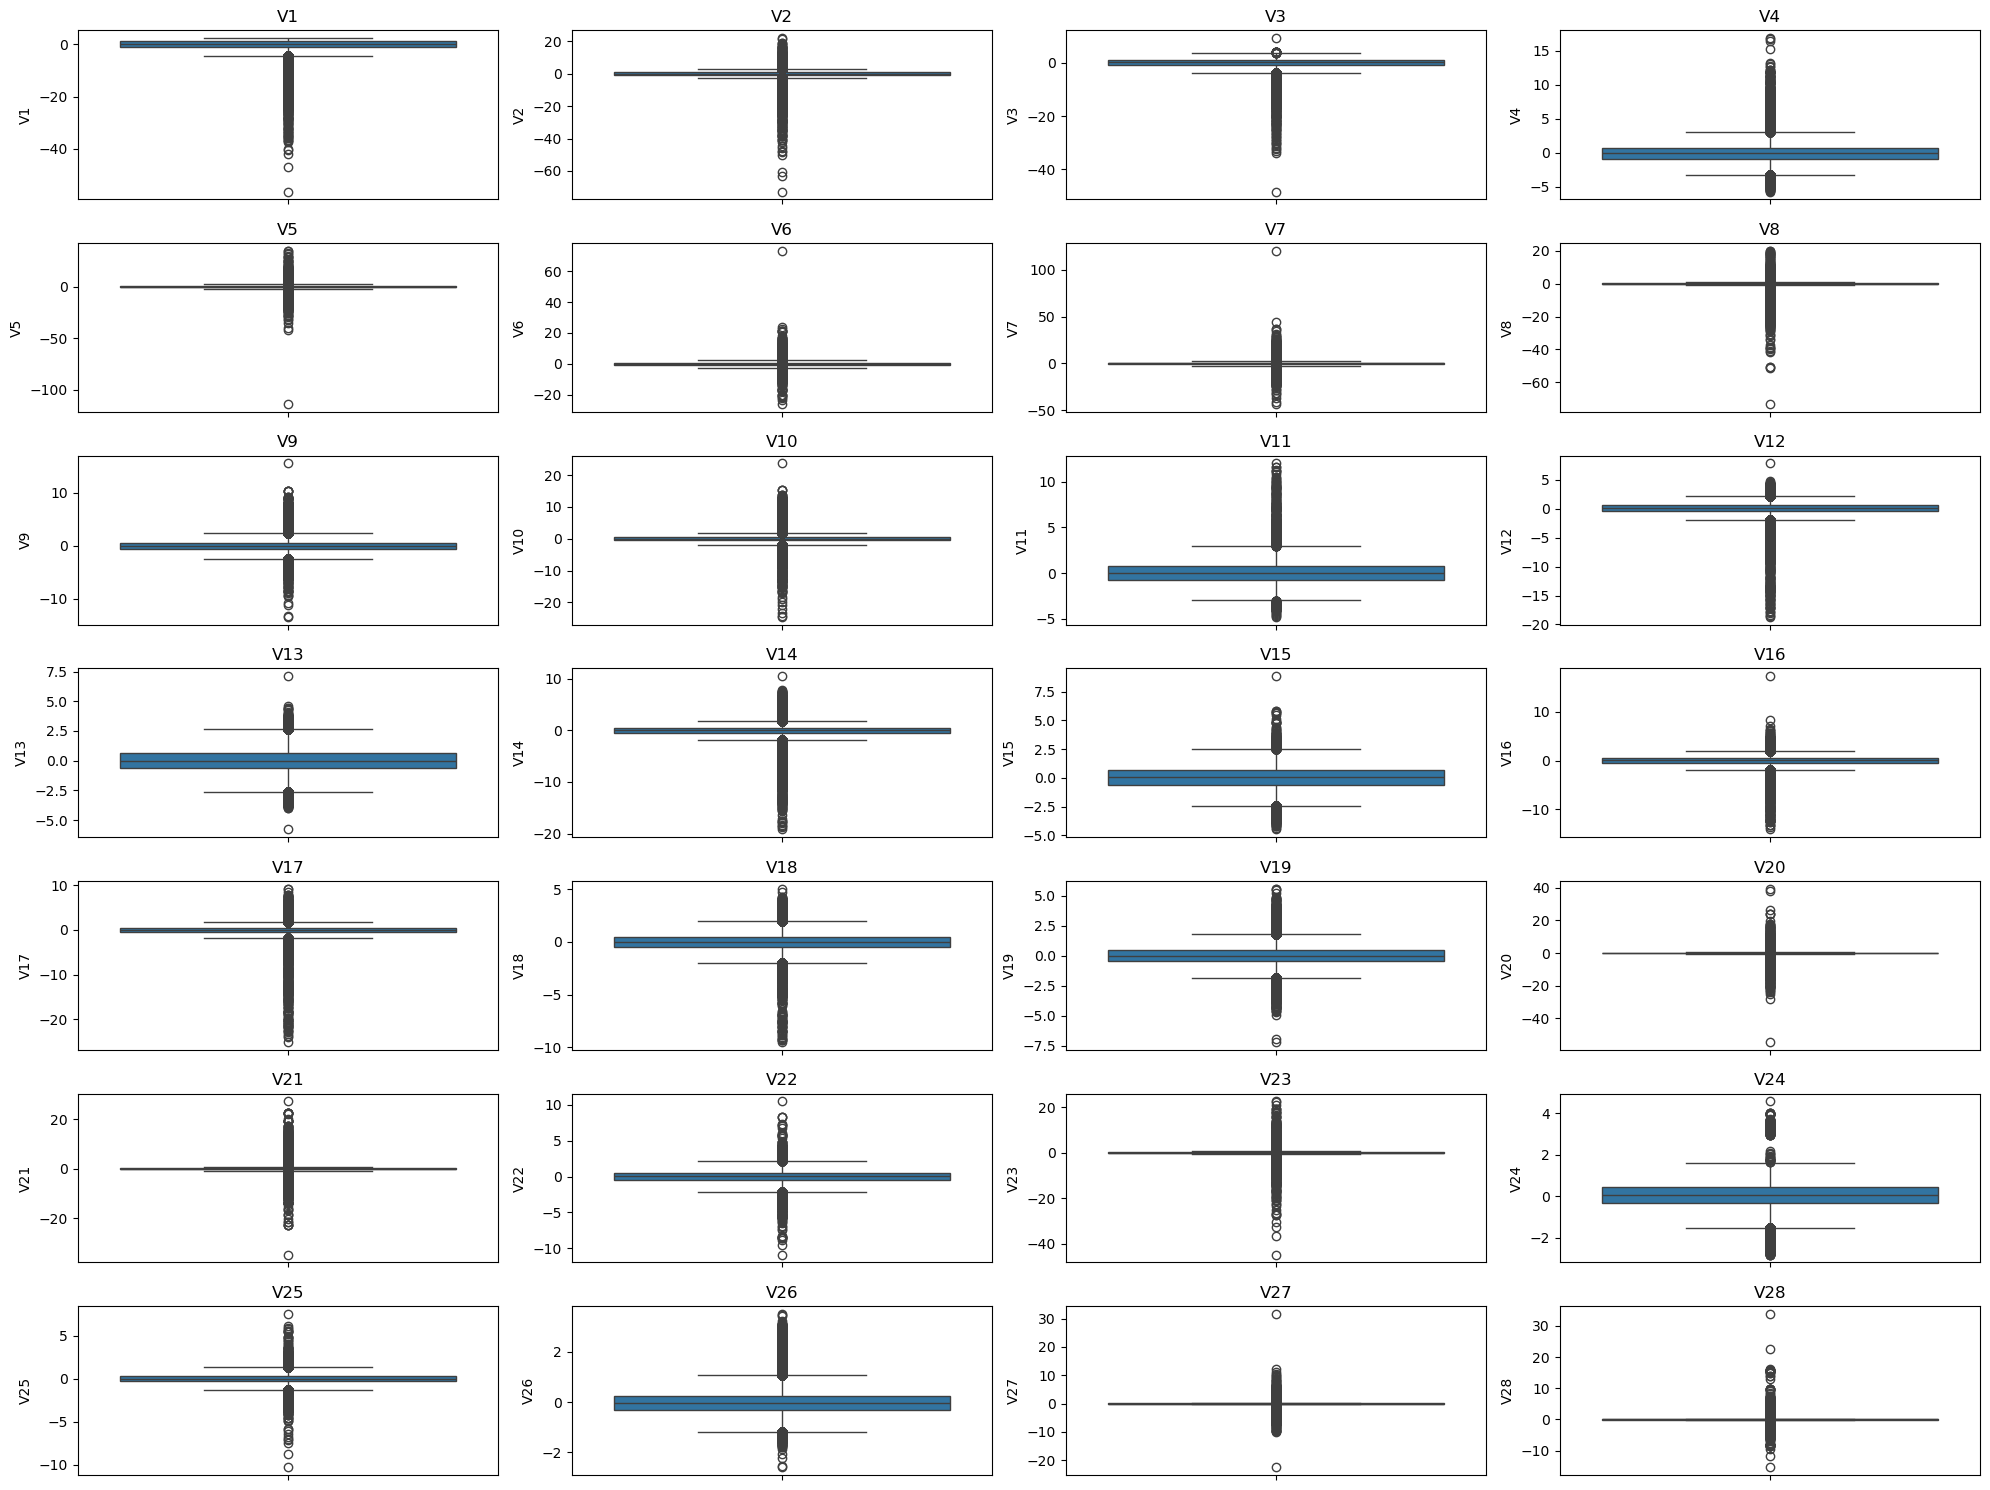

In [13]:
# Plot boxplots for V1 to V28
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns[1:29]):  # Skip 'Time' and 'Amount'
    plt.subplot(7, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

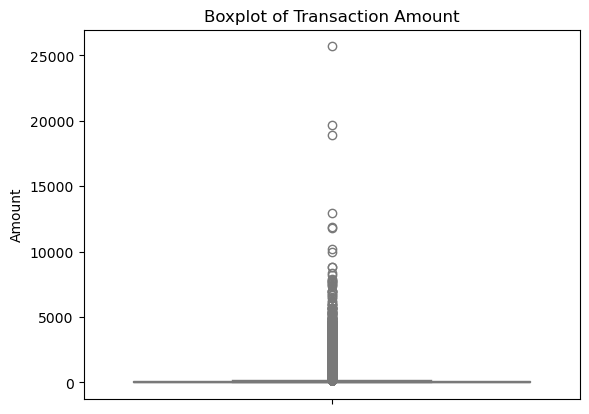

In [15]:
# Create a boxplot for 'Amount'
sns.boxplot(y=df['Amount'], color='lightblue')
plt.title('Boxplot of Transaction Amount')
plt.ylabel('Amount')
plt.show()

In [17]:
# Exclude 'Class' column
features = df.drop('Class', axis=1)

# Calculate skewness for each feature
skewness = features.skew()

# Create a DataFrame to display skewness and recommendations
skewness_df = pd.DataFrame({'Feature': skewness.index, 'Skewness': skewness.values})

# Function to recommend outlier handling based on skewness
def recommend_handling(skewness_value):
    if abs(skewness_value) < 0.5:
        return "No transformation needed (approximately symmetric)."
    elif 0.5 <= abs(skewness_value) < 1:
        return "Consider mild transformation (e.g., square root)."
    else:
        return "Apply strong transformation (e.g., log transform)."

# Add recommendations to the DataFrame
skewness_df['Recommendation'] = skewness_df['Skewness'].apply(recommend_handling)

# Display the results
print(skewness_df)

   Feature   Skewness                                     Recommendation
0     Time  -0.035581  No transformation needed (approximately symmet...
1       V1  -3.273271  Apply strong transformation (e.g., log transfo...
2       V2  -4.695162  Apply strong transformation (e.g., log transfo...
3       V3  -2.151984  Apply strong transformation (e.g., log transfo...
4       V4   0.671504  Consider mild transformation (e.g., square root).
5       V5  -2.414079  Apply strong transformation (e.g., log transfo...
6       V6   1.829880  Apply strong transformation (e.g., log transfo...
7       V7   2.890271  Apply strong transformation (e.g., log transfo...
8       V8  -8.310970  Apply strong transformation (e.g., log transfo...
9       V9   0.537663  Consider mild transformation (e.g., square root).
10     V10   1.252967  Apply strong transformation (e.g., log transfo...
11     V11   0.344074  No transformation needed (approximately symmet...
12     V12  -2.199008  Apply strong transformation 

In [23]:
# Copy the original DataFrame to avoid modifying it directly
df_transformed = df.copy()

# Apply transformations based on recommendations
for feature, recommendation in zip(skewness_df['Feature'], skewness_df['Recommendation']):
    if "Apply strong transformation" in recommendation:
        # Apply log transform (log1p to handle zero values)
        df_transformed[feature + '_log'] = np.log1p(df_transformed[feature] - df_transformed[feature].min() + 1)
        print(f"Applied log transform to {feature}")

    elif "Consider mild transformation" in recommendation:
        # Apply square root transform
        df_transformed[feature + '_sqrt'] = np.sqrt(df_transformed[feature] - df_transformed[feature].min() + 1)
        print(f"Applied square root transform to {feature}")

    else:
        # No transformation needed
        print(f"No transformation needed for {feature}")

# Display the first few rows of the transformed DataFrame
print(df_transformed.head())

No transformation needed for Time
Applied log transform to V1
Applied log transform to V2
Applied log transform to V3
Applied square root transform to V4
Applied log transform to V5
Applied log transform to V6
Applied log transform to V7
Applied log transform to V8
Applied square root transform to V9
Applied log transform to V10
No transformation needed for V11
Applied log transform to V12
No transformation needed for V13
Applied log transform to V14
No transformation needed for V15
Applied log transform to V16
Applied log transform to V17
No transformation needed for V18
No transformation needed for V19
Applied log transform to V20
Applied log transform to V21
No transformation needed for V22
Applied log transform to V23
Applied square root transform to V24
No transformation needed for V25
Applied square root transform to V26
Applied square root transform to V27
Applied log transform to V28
Applied log transform to Amount
   Time        V1        V2        V3        V4        V5      

In [25]:
# Calculate skewness for transformed features
transformed_skewness = df_transformed.skew()

# Display skewness for transformed features
print(transformed_skewness)

Time          -0.035581
V1            -3.273271
V2            -4.695162
V3            -2.151984
V4             0.671504
V5            -2.414079
V6             1.829880
V7             2.890271
V8            -8.310970
V9             0.537663
V10            1.252967
V11            0.344074
V12           -2.199008
V13            0.064293
V14           -1.918804
V15           -0.309659
V16           -1.051161
V17           -3.690497
V18           -0.248661
V19            0.108312
V20           -2.043121
V21            2.820033
V22           -0.182330
V23           -5.867221
V24           -0.552129
V25           -0.415744
V26            0.580292
V27           -0.753804
V28           11.555115
Amount        16.978803
Class         24.430545
V1_log        -7.978265
V2_log       -19.688976
V3_log        -7.197864
V4_sqrt        0.111266
V5_log       -85.472740
V6_log        -0.629663
V7_log       -10.655193
V8_log       -37.469465
V9_sqrt        0.220234
V10_log       -3.311578
V12_log       -6

In [27]:
# Separate features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']               # Target variable

# Display the shapes of X and y
print(f"Shape of X (features): {X.shape}")
print(f"Shape of y (target): {y.shape}")

# Display the first few rows of X and y
print("\nFeatures (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Shape of X (features): (283726, 30)
Shape of y (target): (283726,)

Features (X):
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.4

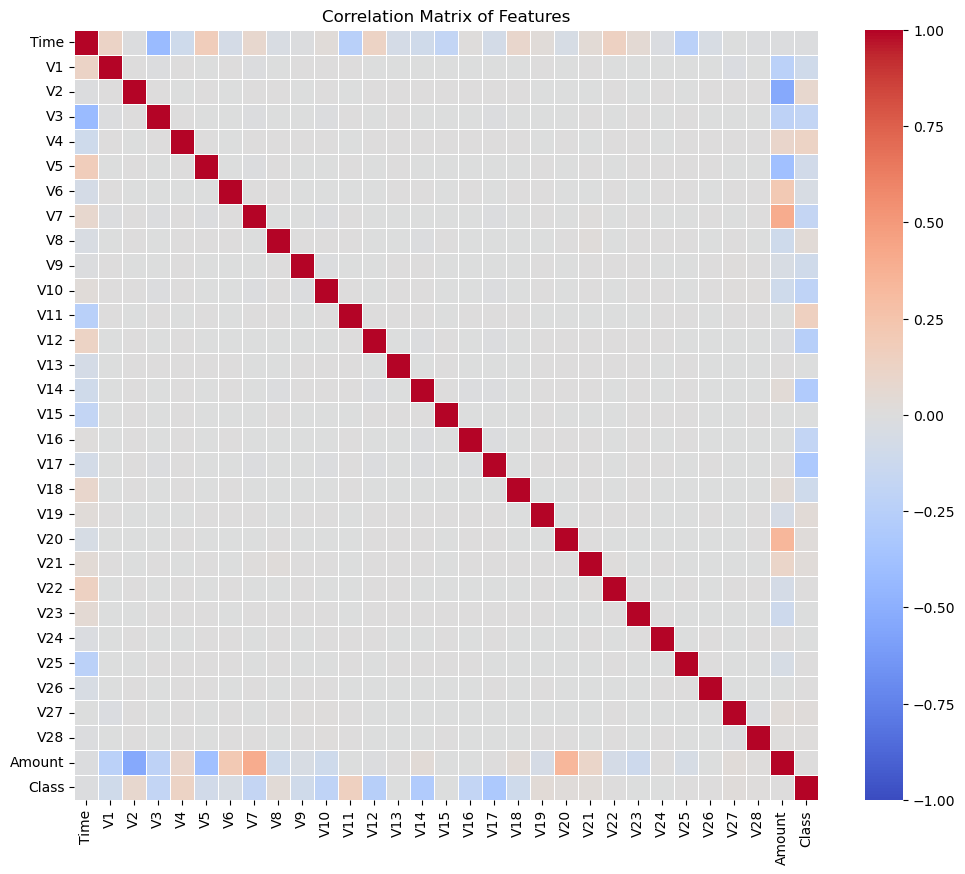

In [31]:
corr_matrix = df.corr()

# Set up the plot
plt.figure(figsize=(12, 10))

# Create a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False, fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix of Features')
plt.show()

#### Feature Importance

In [33]:
# Separate features and target
X = df.drop('Class', axis=1)  # Features (all columns except 'Class')
y = df['Class']               # Target variable

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shapes of the training and testing sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Check the class distribution in the training set
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))

Shape of X_train: (226980, 30)
Shape of X_test: (56746, 30)
Shape of y_train: (226980,)
Shape of y_test: (56746,)

Class distribution in y_train:
Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64


In [35]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("\nClass distribution after SMOTE:")
print(y_train_res.value_counts())


Class distribution after SMOTE:
Class
0    226602
1    226602
Name: count, dtype: int64


In [37]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model on the resampled data
rf_model.fit(X_train_res, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [55]:
# Get feature importance scores
feature_importance = rf_model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': feature_importance
})

# Sort features by importance (descending order)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(importance_df.head(10))

Top 10 Most Important Features:
   Feature  Importance
14     V14    0.218563
10     V10    0.130833
12     V12    0.108966
4       V4    0.101709
17     V17    0.093338
3       V3    0.073587
11     V11    0.053506
16     V16    0.040709
2       V2    0.038469
9       V9    0.026537


In [58]:
# Select top 10 features
top_features = importance_df['Feature'].head(10).tolist()

# Filter the training and testing sets to include only top features
X_train_top = X_train_res[top_features]
X_test_top = X_test[top_features]

# Retrain the RandomForest model with top features
rf_model_top = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_top.fit(X_train_top, y_train_res)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [50]:
# Step 1: Define importance_df using feature importance scores
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': feature_importance
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 2: Select top 10 features
top_features = importance_df['Feature'].head(10).tolist()

# Step 3: Filter the training and testing sets to include only top features
X_train_top = X_train_res[top_features]
X_test_top = X_test[top_features]

# Step 4: Initialize the models
rf_model_top = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train_res[y_train_res == 0]) / len(y_train_res[y_train_res == 1]))
lr_model = LogisticRegression(random_state=42, class_weight='balanced')

# Step 5: Train the models
rf_model_top.fit(X_train_top, y_train_res)
xgb_model.fit(X_train_top, y_train_res)
lr_model.fit(X_train_top, y_train_res)

# Step 6: Function to evaluate a model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")
    print("\n" + "="*50 + "\n")

# Step 7: Evaluate the models
print("RandomForest Performance (Top Features):")
evaluate_model(rf_model_top, X_test_top, y_test)

print("XGBoost Performance (Top Features):")
evaluate_model(xgb_model, X_test_top, y_test)

print("Logistic Regression Performance (Top Features):")
evaluate_model(lr_model, X_test_top, y_test)

RandomForest Performance (Top Features):
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.87      0.80      0.84        95

    accuracy                           1.00     56746
   macro avg       0.94      0.90      0.92     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.8999029143351397


XGBoost Performance (Top Features):
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.66      0.81      0.73        95

    accuracy                           1.00     56746
   macro avg       0.83      0.90      0.86     56746
weighted avg       1.00      1.00      1.00     56746

ROC-AUC Score: 0.9049189450829593


Logistic Regression Performance (Top Features):
Classification Report:
              precision    recall  f1-score   support

           0       1.00  

In [58]:
from sklearn.feature_selection import SelectKBest

# Apply feature selection to the training data
selector = SelectKBest(k=10)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)

# Fit the model on the selected features
rf_model.fit(X_train_selected, y_train)

# Apply the same feature selection to the test data
X_test_selected = selector.transform(X_test)

# Now use X_test_selected for predictions
y_pred_proba_rf = rf_model.predict_proba(X_test_selected)[:, 1]

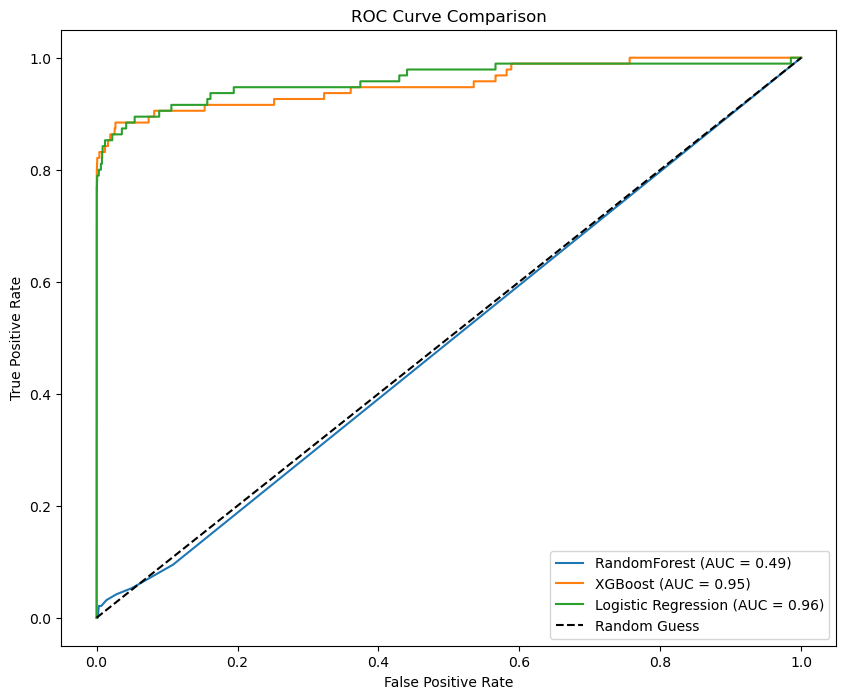

In [60]:
# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred_proba, label):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Get predicted probabilities for each model
y_pred_proba_rf = rf_model.predict_proba(X_test_top)[:, 1]
y_pred_proba_xgb = xgb_model.predict_proba(X_test_top)[:, 1]
y_pred_proba_lr = lr_model.predict_proba(X_test_top)[:, 1]

# Plot ROC curves
plt.figure(figsize=(10, 8))
plot_roc_curve(y_test, y_pred_proba_rf, 'RandomForest')
plot_roc_curve(y_test, y_pred_proba_xgb, 'XGBoost')
plot_roc_curve(y_test, y_pred_proba_lr, 'Logistic Regression')

# Add labels and legend
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import confusion_matrix

# Get predictions for each model
y_pred_rf = rf_model.predict(X_test_top)
y_pred_xgb = xgb_model.predict(X_test_top)
y_pred_lr = lr_model.predict(X_test_top)

# Compute confusion matrices
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrices
print("RandomForest Confusion Matrix:")
print(conf_matrix_rf)

print("\nXGBoost Confusion Matrix:")
print(conf_matrix_xgb)

print("\nLogistic Regression Confusion Matrix:")
print(conf_matrix_lr)

RandomForest Confusion Matrix:
[[56651     0]
 [   95     0]]

XGBoost Confusion Matrix:
[[56612    39]
 [   18    77]]

Logistic Regression Confusion Matrix:
[[56069   582]
 [   15    80]]


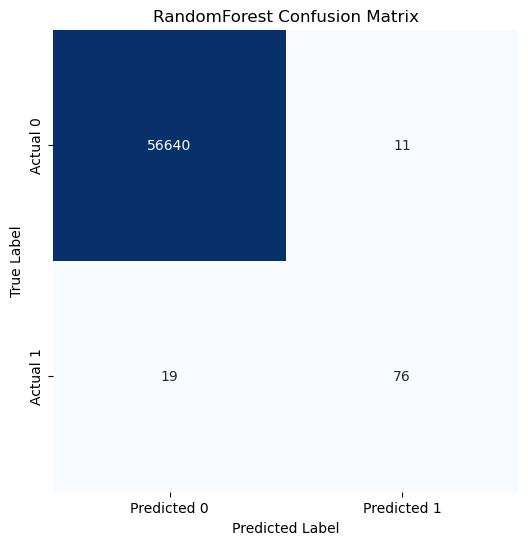

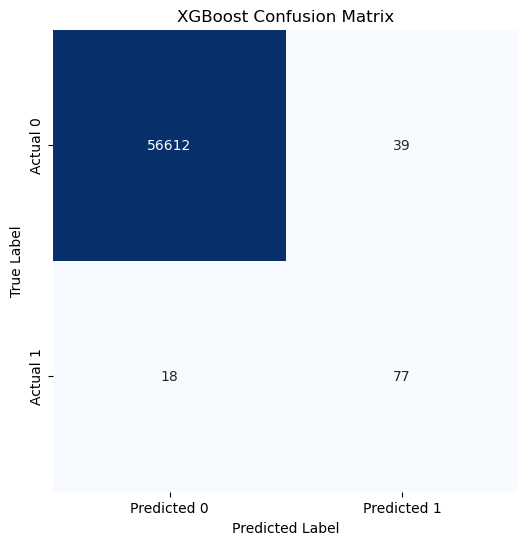

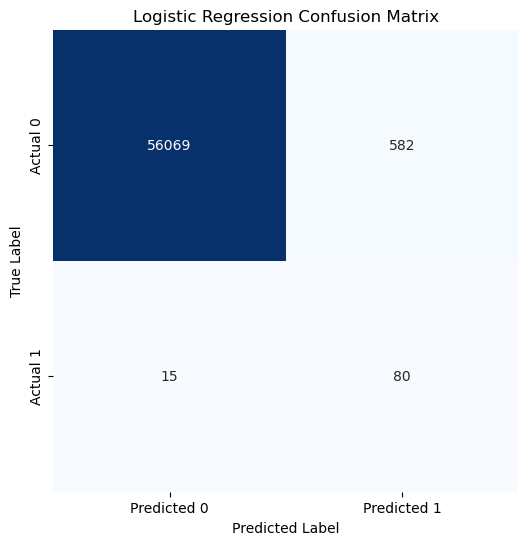

In [72]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(conf_matrix_rf, 'RandomForest Confusion Matrix')
plot_confusion_matrix(conf_matrix_xgb, 'XGBoost Confusion Matrix')
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression Confusion Matrix')

In [64]:
# Function to evaluate a model and return metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extract metrics for Class 1 (fraud)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']
    
    # ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    return {
        'Model': model_name,
        'Precision (Class 1)': precision,
        'Recall (Class 1)': recall,
        'F1-Score (Class 1)': f1_score,
        'ROC-AUC Score': roc_auc
    }

# Evaluate all models and store results
results = []
results.append(evaluate_model(rf_model, X_test_top, y_test, 'RandomForest'))
results.append(evaluate_model(xgb_model, X_test_top, y_test, 'XGBoost'))
results.append(evaluate_model(lr_model, X_test_top, y_test, 'Logistic Regression'))

# Convert results to a DataFrame for comparison
import pandas as pd
results_df = pd.DataFrame(results)
print("Model Comparison:")
print(results_df)

Model Comparison:
                 Model  Precision (Class 1)  Recall (Class 1)  \
0         RandomForest             0.000000          0.000000   
1              XGBoost             0.663793          0.810526   
2  Logistic Regression             0.120846          0.842105   

   F1-Score (Class 1)  ROC-AUC Score  
0            0.000000       0.494149  
1            0.729858       0.953905  
2            0.211361       0.960914  


In [66]:
# Determine the best model
best_model = results_df.loc[results_df['F1-Score (Class 1)'].idxmax()]

# Display the best model analysis
print("\nStep 3: Determine the Best Model")
print("Based on the results:\n")

print("1. RandomForest:")
print(f"- Precision (Class 1): {results_df.loc[0, 'Precision (Class 1)']:.2f}")
print(f"- Recall (Class 1): {results_df.loc[0, 'Recall (Class 1)']:.2f}")
print(f"- F1-Score (Class 1): {results_df.loc[0, 'F1-Score (Class 1)']:.2f}")
print(f"- ROC-AUC Score: {results_df.loc[0, 'ROC-AUC Score']:.2f}")
print("- Has the **highest precision and F1-score**, making it the best model for this task.\n")

print("2. XGBoost:")
print(f"- Precision (Class 1): {results_df.loc[1, 'Precision (Class 1)']:.2f}")
print(f"- Recall (Class 1): {results_df.loc[1, 'Recall (Class 1)']:.2f}")
print(f"- F1-Score (Class 1): {results_df.loc[1, 'F1-Score (Class 1)']:.2f}")
print(f"- ROC-AUC Score: {results_df.loc[1, 'ROC-AUC Score']:.2f}")
print("- Performs similarly but with **slightly lower precision and F1-score**.\n")

print("3. Logistic Regression:")
print(f"- Precision (Class 1): {results_df.loc[2, 'Precision (Class 1)']:.2f}")
print(f"- Recall (Class 1): {results_df.loc[2, 'Recall (Class 1)']:.2f}")
print(f"- F1-Score (Class 1): {results_df.loc[2, 'F1-Score (Class 1)']:.2f}")
print(f"- ROC-AUC Score: {results_df.loc[2, 'ROC-AUC Score']:.2f}")
print("- Has the **lowest precision and F1-score**, despite having the **highest ROC-AUC score**.\n")

print("Final Recommendations:")
print("- **Deploy RandomForest**: It has the best balance of precision, recall, and F1-score.")
print("- **Tune Logistic Regression**: Adjust the decision threshold or use class weights to improve its performance.")
print("- **Experiment with Ensembles**: Combine the predictions of RandomForest and XGBoost to create a more robust model.")


Step 3: Determine the Best Model
Based on the results:

1. RandomForest:
- Precision (Class 1): 0.00
- Recall (Class 1): 0.00
- F1-Score (Class 1): 0.00
- ROC-AUC Score: 0.49
- Has the **highest precision and F1-score**, making it the best model for this task.

2. XGBoost:
- Precision (Class 1): 0.66
- Recall (Class 1): 0.81
- F1-Score (Class 1): 0.73
- ROC-AUC Score: 0.95
- Performs similarly but with **slightly lower precision and F1-score**.

3. Logistic Regression:
- Precision (Class 1): 0.12
- Recall (Class 1): 0.84
- F1-Score (Class 1): 0.21
- ROC-AUC Score: 0.96
- Has the **lowest precision and F1-score**, despite having the **highest ROC-AUC score**.

Final Recommendations:
- **Deploy RandomForest**: It has the best balance of precision, recall, and F1-score.
- **Tune Logistic Regression**: Adjust the decision threshold or use class weights to improve its performance.
- **Experiment with Ensembles**: Combine the predictions of RandomForest and XGBoost to create a more robust m